In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [61]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [62]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


1- For the "Median value of owner-occupied homes" provide a boxplot

Text(0, 0.5, 'values')

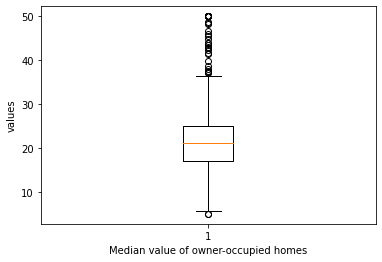

In [63]:
plt.boxplot(boston_df['MEDV'])
plt.xlabel('Median value of owner-occupied homes')
plt.ylabel('values')


2-Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Charles river variable')

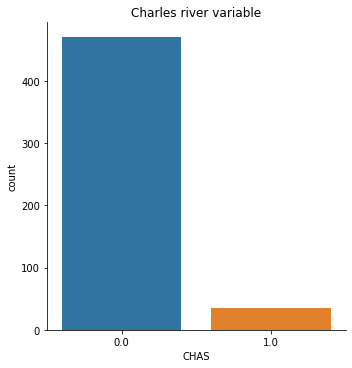

In [64]:
sns.catplot(data=boston_df,x='CHAS',kind='count')
plt.title('Charles river variable')

3- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [65]:
#Discretizing the age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'

In [66]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


Text(0, 0.5, 'Median value of owner-occupied homes in $1000')

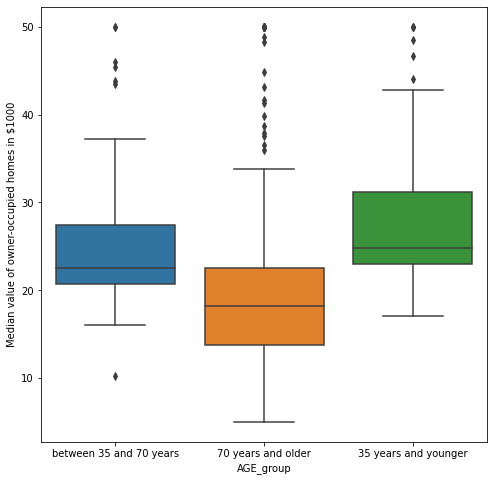

In [67]:
plt.figure(figsize=(8,8))
sns.boxplot(data=boston_df,x='AGE_group',y='MEDV')
plt.ylabel('Median value of owner-occupied homes in $1000')


4-Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, ' non-retail business acres per town')

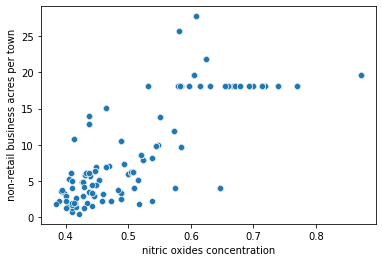

In [68]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS')
plt.xlabel('nitric oxides concentration')
plt.ylabel(' non-retail business acres per town')

CONCLUSION:- 
Non-retail bussiness acres per town increases with increasing NOX concentration and then becomes almost constant.

5-Create a histogram for the pupil to teacher ratio variable


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


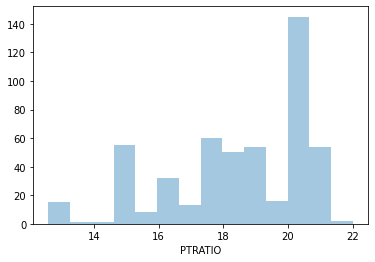

In [69]:
sns.distplot(boston_df['PTRATIO'],kde=False)

TASK 5

1-Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

HYPOTHESIS TESTING

H0 : There is no significant difference in median values of houses bounded by the Charles river.

H1 : There is significant difference in median values of houses by the Charles river.

In [70]:
boston_df['CHAS'].unique()

array([0., 1.])

In [71]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')
#since p<0.05, we assume variance are not equal.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [72]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

In [73]:
#p value is less than 0.05, hence we can reject the null hypothesis and state that there is significant difference in median values of houses bounded by the Charles river.

2-Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 


HYPOTHESIS TESTING

H0 : µ\_1 = µ\_2 = µ\_3$  ie There is no difference in means of Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

H1 : Atleast one means differ.

In [74]:
less_than_35=boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV']
betw35_and_70=boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV']
more_than_70=boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']

In [75]:
f_statistic, p_value = scipy.stats.f_oneway(less_than_35, betw35_and_70, more_than_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [79]:
#Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis.

3-Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

Hypothesis;
H_0: There is no relationship bw Nitric oxide concentrations and proportion of non-retail business acres per town.

H_1: Nitric oxide concentrations affects proportion of non-retail business acres per town

In [76]:
import statsmodels.api as sm
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           7.91e-98
Time:                        09:10:39   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
#Pearson corr coef~ 0.763 which states that there exists strong corr bw independent and target variable.
#Also, p<0.05, hence we can reject the null hypothesis and state that there exists relationship bw both the variables.

4-What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [77]:
X1 = boston_df['DIS']
y1 = boston_df['MEDV']
X1 = sm.add_constant(X1) 

model1 = sm.OLS(y1, X1).fit()
predictions = model1.predict(X1)

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        09:10:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
#Corr Coef= 0.248, not highly correlated
#coef=1.09 ie with every unit increase in additional weighted distance , MEDV increases by 1.09.